# Pandas tutorial

## Some data

Road accidents statistics:


In [8]:
import pandas as pd
data = pd.read_csv("data/usagers_2016.csv")
data.shape


(133422, 12)

In [12]:
data.values

array([[201600000001, 1.0, 1, ..., 0.0, 1983.0, 'B02'],
       [201600000001, 1.0, 1, ..., 0.0, 2001.0, 'A01'],
       [201600000002, 1.0, 1, ..., 0.0, 1960.0, 'A01'],
       ..., 
       [201600059432, 1.0, 1, ..., 0.0, 1967.0, 'A01'],
       [201600059432, 2.0, 2, ..., 0.0, 1967.0, 'A01'],
       [201600059432, 1.0, 1, ..., 0.0, 1981.0, 'B01']], dtype=object)

In [17]:
data["place"].head() 

0    1.0
1    1.0
2    1.0
3    2.0
4    3.0
Name: place, dtype: float64

In [21]:
data.loc[1:20,  ["place"]].head() # Line

,place
1,1.0
2,1.0
3,2.0
4,3.0
5,1.0


In [24]:
data.place.unique() # Les places qui existent

array([  1.,   2.,   3.,  nan,   5.,   4.,   8.,   6.,   7.,   9.])

In [64]:
stat = data[ ["grav", "catu", "secu"] ].groupby( ["catu", "grav"]).count().unstack()
stat["total"] = stat.sum(axis = 1)
stat = stat.div(stat.total, axis = 0)*100.
stat.columns = ["Indemne", "Mort", "Hospitalisé", "Blessé Léger", "Total"]
stat.index = ["Conducteur", "Passagers", "Piétons", "Trotinettes"]
stat

,Indemne,Mort,Hospitalisé,Blessé Léger,Total
Conducteur,47.771325,2.495834,18.829352,30.903490,100.0
Passagers,31.593235,2.554517,23.324433,42.527815,100.0
Piétons,2.025630,3.265812,30.963208,63.745349,100.0
Trotinettes,2.976190,1.785714,30.952381,64.285714,100.0


In [71]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

<IPython.core.display.Javascript object>


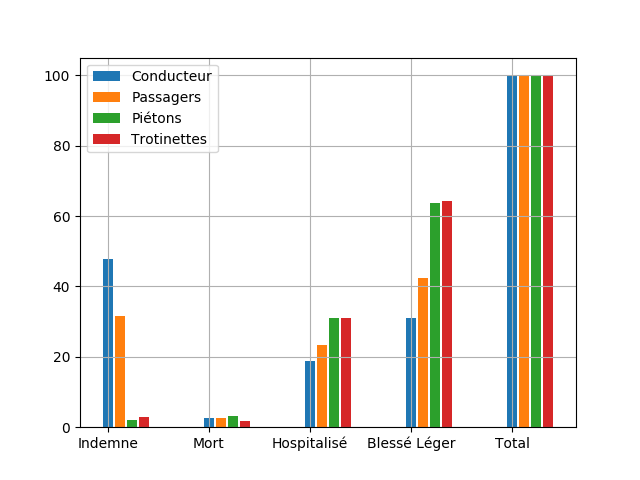

In [89]:
x = np.arange(len(stat.columns))
plt.figure()
offset = 0.
for pos in stat.index:
    plt.bar(x + offset, stat.loc[pos], width = .1, label = pos)
    offset += .12     
plt.legend()
plt.grid()
plt.xticks(x, stat.columns)
#stat.loc["Conducteur"].plot("hist")
plt.show()